# <span style='color:Blue'> Student Performance Analysis </span>

This `Notebook` is based on the analysis of a dataset concerning the performance in Mathematics of some students of secondary school and some personal information related to them. It was used to find out the relationship amoung variables, to find out the most important features that influence the students performance. We will use some different models and different tasks.

## 1. Import Libraries
To develop our prediction model, we need to import the necessary Python libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## 2. Load Data

This dataset is from the UCI Machine Learning Repository and is comprised of student performance inforation (can be found by clicking the following link: https://archive.ics.uci.edu/ml/datasets/Student+Performance). The data contains the following features:

* `school` - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

* `sex` - student’s sex (binary: ‘F’ - female or ‘M’ - male)

* `age` - student’s age (numeric: from 15 to 22)

* `address` - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

* `famsize` - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)

* `Pstatus` - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)

* `Medu` - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

* `Fedu` - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* `Mjob` - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)
* `Fjob` - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)
* `reason` - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)
* `guardian` - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)
* `traveltime` - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* `studytime` - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* `failures` - number of past class failures (numeric: n if 1<=n<3, else 4)
* `schoolsup` - extra educational support (binary: yes or no)
* `famsup` - family educational support (binary: yes or no)
* `paid` - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* `activities` - extra-curricular activities (binary: yes or no)
* `nursery` - attended nursery school (binary: yes or no)
* `higher` - wants to take higher education (binary: yes or no)
* `internet` - Internet access at home (binary: yes or no)
* `romantic` - with a romantic relationship (binary: yes or no)
* `famrel` - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* `freetime` - free time after school (numeric: from 1 - very low to 5 - very high)
* `goout` - going out with friends (numeric: from 1 - very low to 5 - very high)
* `Dalc` - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* `health` - current health status (numeric: from 1 - very bad to 5 - very good)
* `absences` - number of school absences (numeric: from 0 to 93)
* `G1` - first period grade (numeric: from 0 to 20)
* `G2` - second period grade (numeric: from 0 to 20)
* `G3` - final grade (numeric: from 0 to 20, output target)


The value on which we try to make predictions is `G3`, represents the grade at the end of the year and is therefore the one that determines the success or failure of the school year.

In [2]:
data = pd.read_csv('student-mat.csv')

### 3. Explore Data Analysis

It’s a good practice to take a look at the data and make sure it looks the way you expect it to look. Let's try to understand the influence of the parents background, test preparation etc on students performance.

Let's see the first 5 lines of our DataFrame. This will give us an overview of what variables are in our dataset.

In [3]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Based on the first lines in the table, we can get a basic insight into the data we are working with. We want to check how much data do we have within each variable.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

To see statistical details of the dataset, we'll use the `describe()` function:

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Let's see how is the data correlated:

To further analyze our data, let's first plot a histogram with Kernel density estimation for the final score.

Text(0, 0.5, 'Frequency')

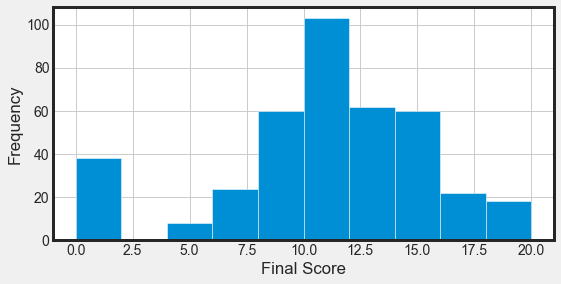

In [6]:
plt.figure(figsize=(8, 4))
sns.set_style('white')
data["G3"].hist(bins=10)
plt.xlabel('Final Score')
plt.ylabel('Frequency')

From distribution plot above, there is something seems off with our target data. Apart from the high number of students scoring 0, the distribution is normal as expected. Maybe the value 0 is used in place of null. Or maybe the students who did not appear for the exam, or were not allowed to sit for the exam due to some reason are marked as 0. We cannot be sure. But from the checking for missing values above, there is no null values, so maybe grade 0 does not mean null after all.

Because there are many variables, we need to look at the correlation of the target variable with several predictors, so that we can know which variables have a significant effect on the target variable.

<AxesSubplot:title={'center':'Distribution of count of Age & Sex'}, xlabel='age', ylabel='count'>

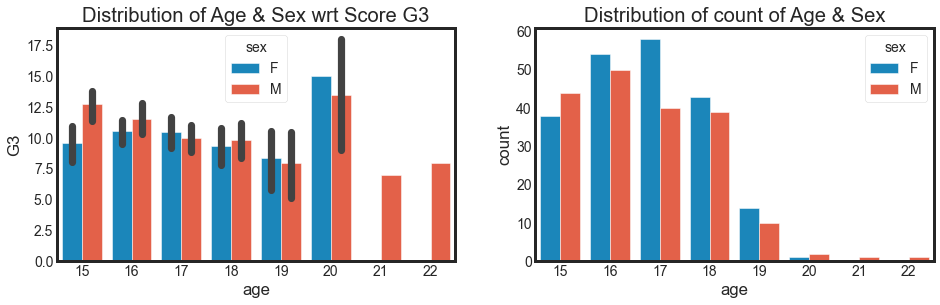

In [7]:
fg, axs = plt.subplots(1, 2, figsize=(14,4))

axs[0].set_title('Distribution of Age & Sex wrt Score G3')
sns.barplot(x='age', y='G3', hue='sex', data=data, ax=axs[0])

axs[1].set_title('Distribution of count of Age & Sex')
sns.countplot(x='age', hue='sex', data=data, ax=axs[1])

From the diagram of the relationship between age, gender and the final score, it can be seen that the highest and lowest scores of male students are higher than female. So, the values of the final grades of both male and female students are almost the same.

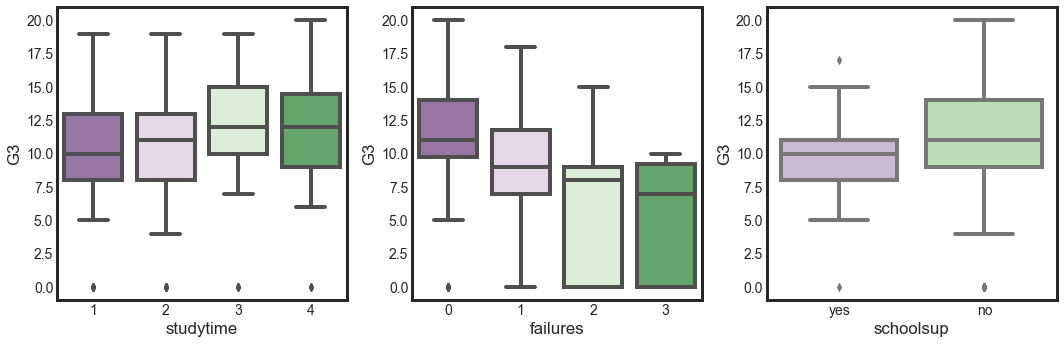

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'studytime', y = 'G3', data = data,palette = "PRGn")

plt.subplot(1,3,2)
sns.boxplot(x = 'failures', y = 'G3', data = data,palette = "PRGn")

plt.subplot(1,3,3)
sns.boxplot(x = 'schoolsup', y = 'G3', data = data,palette = "PRGn")

plt.tight_layout()
plt.show()

The studytime predictor consists of 4 classes classified based on the length of study time in a week, and from the first diagram above, it can be seen that there is a slight tendency for an increase in the mean final grade along with the increase in weekly study hours. For the correlation between the number of failures in the previous class and the final grade, there is a clear relationship, where the more students failed in the previous class, the smaller the final score obtained. There is something unique from the third diagramm. Groups of students who received extra educational support, it turned out that most had lower final scores than most students who did not receive extra educational support.

For the correlation between the number of failures in the previous class and the final grade, there is a clear relationship, where the more students failed in the previous class, the smaller the final score obtained.

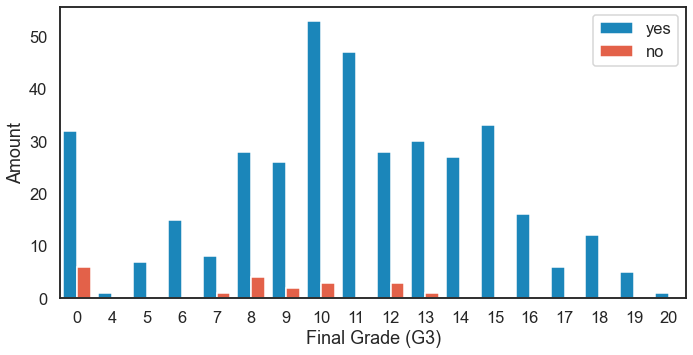

In [9]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
ax = sns.countplot(x="G3", hue="higher", data=data)
ax.legend(loc='upper right',frameon=True)
ax.set(xlabel='Final Grade (G3)',ylabel='Amount')
plt.show()

The desire to continue to higher education can actually trigger students to be more active in studying so that the final grades obtained are also good, as seen from the diagram above, students who want to continue to higher education tend to have better final grades than those who don’t want to continue to higher education.

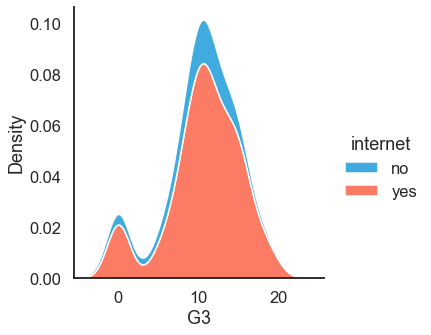

In [10]:
sns.displot(data, x="G3", hue="internet", kind="kde", multiple="stack")

Internet access at home has a slight role in increasing students’ final grades, as seen in the diagram above, even though their median scores are almost the same.

<AxesSubplot:xlabel='freetime', ylabel='G3'>

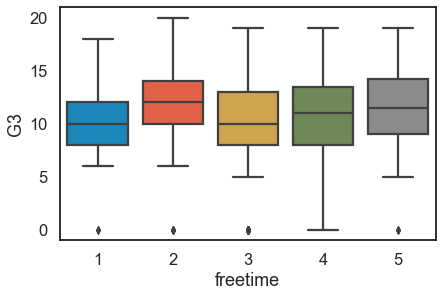

In [11]:
sns.boxplot(x="freetime", y="G3", data=data)

The amount of free time after school does not guarantee that students will get a high final score, seen from the diagram above, there is no visible relationship between the addition of free time to the final score.

### 4. Preprocessing

The summary of the data reveals that the dataset has multiple categorical variables that need to be encoded. For this purpose we are using the `LabelEncoder`:

In [12]:
# For each feature, encode to categorical values

from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer

class_le = LabelEncoder()
for column in data[["school", "sex", "address", "famsize", "Pstatus",
                  "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                  "famsup", "paid", "activities", "nursery", "higher",
                  "internet", "romantic"]].columns:
    
    data[column] = class_le.fit_transform(data[column].values)

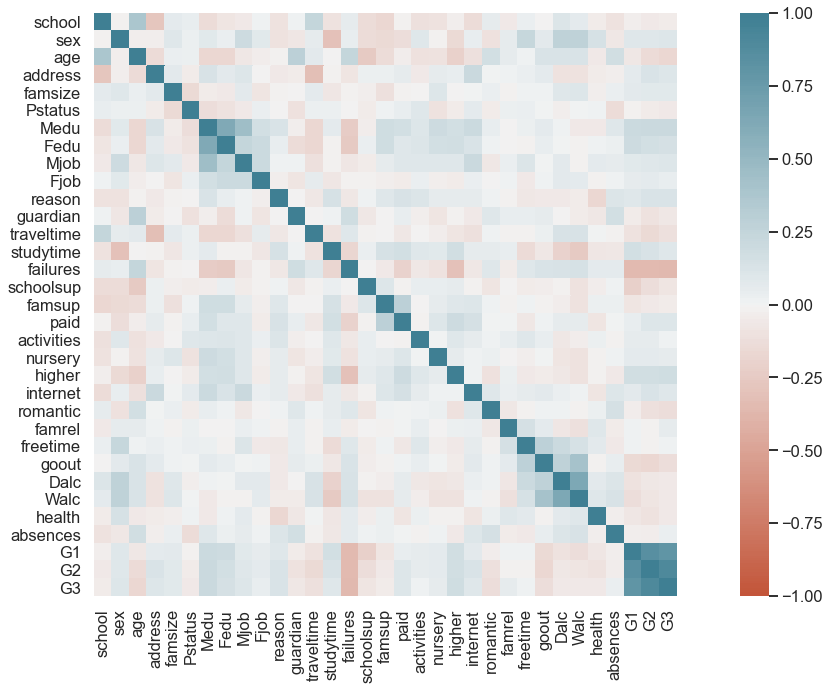

In [13]:
#Correllation matrix
corr_mat=data.corr(method='pearson')


plt.figure(figsize=(20,10))
ax = sns.heatmap(
    corr_mat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)

In [14]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 10))

Top Absolute Correlations
G2        G3      0.904868
G1        G2      0.852118
          G3      0.801468
Dalc      Walc    0.647544
Medu      Fedu    0.623455
          Mjob    0.454805
goout     Walc    0.420386
school    age     0.377610
failures  G3      0.360415
          G2      0.355896
dtype: float64


Before we make the model, we need to split the data into train dataset and test dataset. We will use the train dataset to train the linear regression model. The test dataset will be used as a comparasion and see the performance of our model. We will 67% of the data as the training data and the rest of it as the testing data.

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.33)

First, we are going to standardise the input features:

In [16]:
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train)

test_scaled = scaler.transform(test)

In [17]:
#make dataframes, we need it for better visualisation

scaled_train = pd.DataFrame(train_scaled, columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'])

scaled_test = pd.DataFrame(test_scaled, columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'])

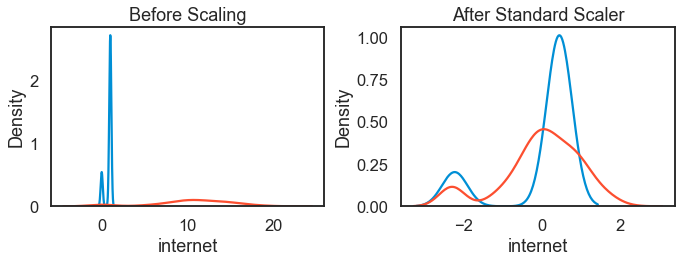

In [18]:
plt.figure(figsize=(10,4))

g1 = plt.subplot(1,2,1)
g1.set_title('Before Scaling')
sns.kdeplot(train['internet'])
sns.kdeplot(train['G3'])

g2 = plt.subplot(1,2,2)
g2.set_title('After Standard Scaler')
sns.kdeplot(scaled_train['internet'])
sns.kdeplot(scaled_train['G3'])

plt.tight_layout()
plt.show()

Splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)

In [19]:
#create X and Y

X_train = scaled_train.iloc[:, :-1]
Y_train = scaled_train.iloc[:, -1:]

X_test = scaled_test.iloc[:, :-1]
Y_test = scaled_test.iloc[:, -1:]

***
***
***

## Linear Regression

We are going to create a linear model in order to predict the student's grade.

In [20]:
from sklearn.linear_model import LinearRegression

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X_train, Y_train)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

[1.52684694e-17]
[[ 0.05189388  0.00820838 -0.07106219  0.00166213 -0.00140043 -0.00363067
   0.01336231 -0.046879   -0.01651342 -0.00650456  0.02515449  0.00733662
   0.02559734 -0.02153387 -0.03534592  0.02953691 -0.00231337  0.0206007
  -0.03266791  0.0015133   0.02096842 -0.03679724 -0.02945596  0.03639603
   0.03838198 -0.0114918  -0.04956361  0.04162639  0.06310441  0.08606705
   0.13161195  0.80258856]]


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lm1_preds = lm1.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(Y_test, lm1_preds)))
print("R^2: ", r2_score(Y_test, lm1_preds))

RMSE : 0.4291759989086255
R^2:  0.8238002945141261


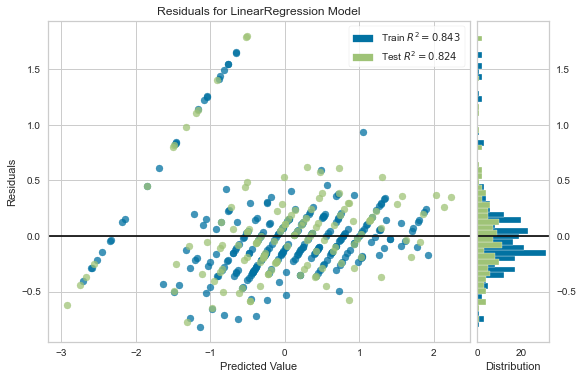

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

visualizer = ResidualsPlot(lm1)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [23]:
features_1 = ['failures', 'studytime', 'higher', 'schoolsup', 'internet', 'goout', 'romantic']
features_2 = ['Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'paid', 'health', 'absences']

In [24]:
# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X_train[features_1], Y_train)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

[2.09191088e-16]
[[-0.23170551  0.05450355  0.12583138 -0.10946541  0.01932695 -0.14111629
  -0.13099613]]


In [25]:
lm2_preds = lm2.predict(X_test[features_1])

print("RMSE :", np.sqrt(mean_squared_error(Y_test, lm2_preds)))
print("R^2: ", r2_score(Y_test, lm2_preds))

RMSE : 0.9317066054841499
R^2:  0.16958980215057096


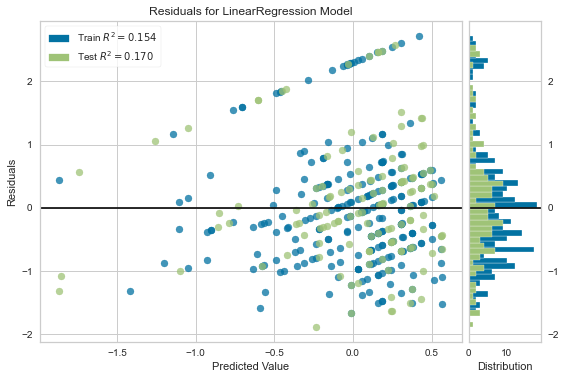

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [26]:
visualizer = ResidualsPlot(lm2)

visualizer.fit(X_train[features_1], Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test[features_1], Y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [27]:
# instantiate and fit
lm3 = LinearRegression()
lm3.fit(X_train[features_2], Y_train)

# print the coefficients
print(lm3.intercept_)
print(lm3.coef_)

[1.9082392e-16]
[[-0.01968292  0.00317504  0.07381464 -0.29762332 -0.09188495  0.03465856
   0.02622559  0.06377044]]


In [28]:
lm3_preds = lm3.predict(X_test[features_2])

print("RMSE :", np.sqrt(mean_squared_error(Y_test, lm3_preds)))
print("R^2: ", r2_score(Y_test, lm3_preds))

RMSE : 0.925691091679804
R^2:  0.1802781838655496


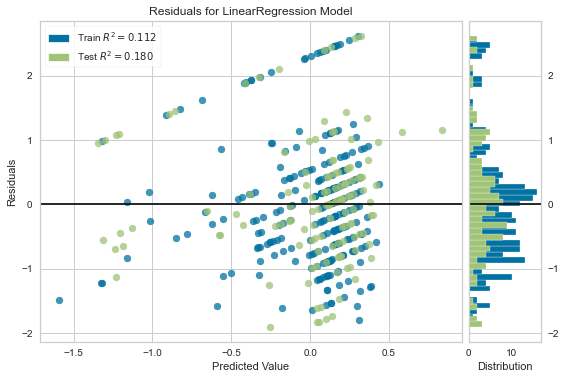

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [29]:
visualizer = ResidualsPlot(lm3)

visualizer.fit(X_train[features_2], Y_train)  # Fit the training data to the visualizer
visualizer.score(X_test[features_2], Y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Performance Analysis of the different linear regression models

In [30]:
print('Features                :  %s' % X_train.columns)
print('Regression Coefficients : ', [np.round(item, 2) for item in lm1.coef_])
print('RMSE                    : ', np.sqrt(mean_squared_error(Y_test, lm1_preds)))
print('R-squared               :  %.2f' % lm1.score(X_test, Y_test))
print('Y-intercept             :  %.2f' % lm1.intercept_)
print('')

print('Features                :  %s' % features_1)
print('Regression Coefficients : ', [np.round(item, 2) for item in lm2.coef_])
print('RMSE                    : ', np.sqrt(mean_squared_error(Y_test, lm2_preds)))
print('R-squared               :  %.2f' % lm2.score(X_test[features_1], Y_test))
print('Y-intercept             :  %.2f' % lm2.intercept_)
print('')

print('Features                :  %s' % features_2)
print('Regression Coefficients : ', [np.round(item, 2) for item in lm3.coef_])
print('RMSE                    : ', np.sqrt(mean_squared_error(Y_test, lm3_preds)))
print('R-squared               :  %.2f' % lm3.score(X_test[features_2], Y_test))
print('Y-intercept             :  %.2f' % lm3.intercept_)
print('')

Features                :  Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')
Regression Coefficients :  [array([ 0.05,  0.01, -0.07,  0.  , -0.  , -0.  ,  0.01, -0.05, -0.02,
       -0.01,  0.03,  0.01,  0.03, -0.02, -0.04,  0.03, -0.  ,  0.02,
       -0.03,  0.  ,  0.02, -0.04, -0.03,  0.04,  0.04, -0.01, -0.05,
        0.04,  0.06,  0.09,  0.13,  0.8 ])]
RMSE                    :  0.4291759989086255
R-squared               :  0.82
Y-intercept             :  0.00

Features                :  ['failures', 'studytime', 'higher', 'schoolsup', 'internet', 'goout', 'romantic']
Regression Coefficients :  [array([-0.23,  0.05,  0.13, -0.11,  0.02, -0.14, -0.13])]
RMSE  

***
***
***

## SVM

First of all it can be interesting how the grades of the students contained in these datasets are distributed so that we can better understand the results. Following the suggestion of [Paulo Cortez and Alice Silva's paper](http://www3.dsi.uminho.pt/pcortez/student.pdf)  the student grades can be analysed using a binary grade system, success/failure.

$$
\text{new G3} = 
\begin{cases}
Approved, \text{if G3 $\geq$ 0}\\
Failed, \text{otherwise}\\
\end{cases}
$$

In [31]:
# Assigning grades to the grades according to the following criteria :
# 0  - 9 marks : 0 (failled)
# 10 - 20 marks : 1 (approved)

def grade_binary_transform(g):
    if g > 9:
        return 1
    else: 
        return 0
    


data['grades'] = data.apply(lambda x: grade_binary_transform(x['G3']), axis = 1 )

data['grades'].value_counts()

1    265
0    130
Name: grades, dtype: int64

In [32]:
data.drop('G3', axis=1, inplace=True)

We are going to use PCA for better interpreting the patterns in this dataset and to reduce the dimensionality for the prediction task.

In [33]:
from sklearn.decomposition import PCA

pca = PCA().fit(data)

In PCA, we first need to know how many components are required to explain the most of our feature variation

In [34]:
pca.explained_variance_ratio_

array([5.90227170e-01, 2.18502439e-01, 2.47707483e-02, 2.36925984e-02,
       1.90603011e-02, 1.81253634e-02, 1.26852260e-02, 1.22576387e-02,
       1.05316849e-02, 9.74044086e-03, 7.18053295e-03, 6.83371749e-03,
       6.03487453e-03, 5.21862692e-03, 4.21235731e-03, 3.86860570e-03,
       3.41221639e-03, 3.05682399e-03, 2.67690039e-03, 2.23997063e-03,
       2.07398680e-03, 2.03428522e-03, 1.74815349e-03, 1.52027892e-03,
       1.43905433e-03, 1.33973804e-03, 1.24497837e-03, 9.57063061e-04,
       8.42221795e-04, 8.21996947e-04, 7.02505886e-04, 6.02956485e-04,
       3.44543034e-04])

In [35]:
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                  'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                  'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                  'PC31','PC32','PC33']})

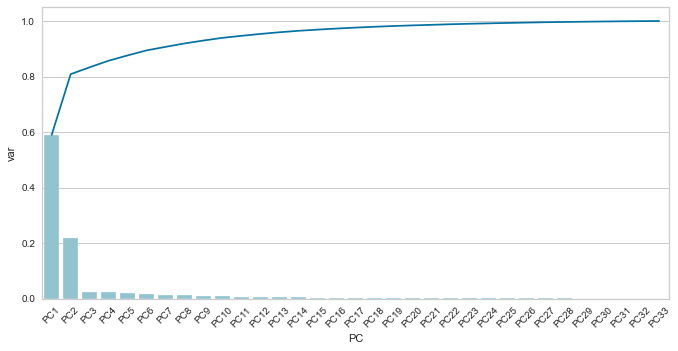

In [36]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

sns.barplot(x='PC',y="var", 
           data=pca_df, color="c");

plt.xticks(rotation=45);

Split the new data

In [37]:
train, test = train_test_split(data,test_size=0.33)

In [38]:
X_train = train.iloc[:, :-1]
Y_train = train.iloc[:, -1:]

X_test = test.iloc[:, :-1]
Y_test = test.iloc[:, -1:]

It’s always important to bring the data into same scale before building the model as otherwise the feature with larger variance will have maximum dominance in the model results. Since PCA determines the components based on variance, it’s mandatory to standardize the features before applying PCA.

In [39]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In our case, two components were chosen as the optimum number of components. We can then start to conduct PCA:

In [40]:
pca = PCA(n_components=2)

pc_train = pca.fit_transform(X_train_scaled)
pc_test = pca.transform(X_test_scaled)

In [41]:
pca.explained_variance_ratio_

array([0.11670006, 0.07819233])

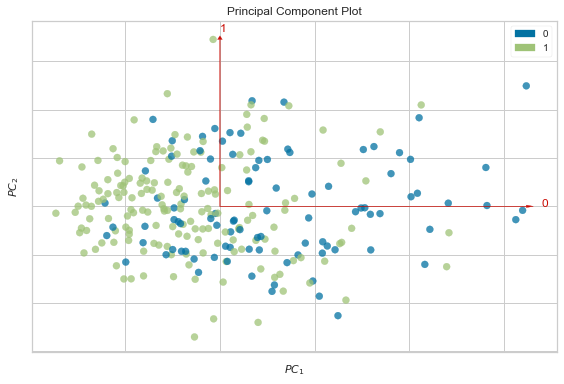

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [42]:
from yellowbrick.features import PCA

new_df = X_train.copy()
new_df["grades"] = Y_train.values

visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(pc_train, new_df['grades'])
visualizer.show()

Fit different kernels to the training data:

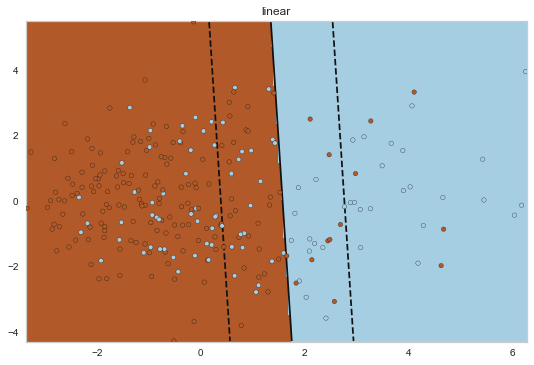

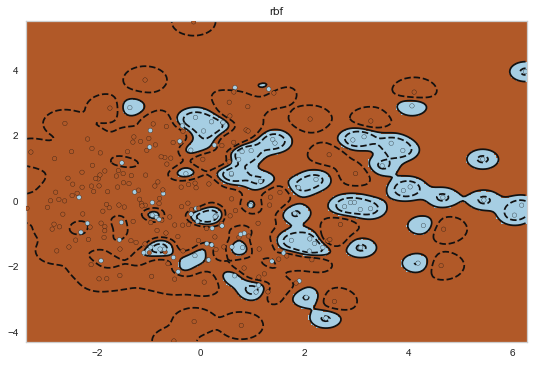

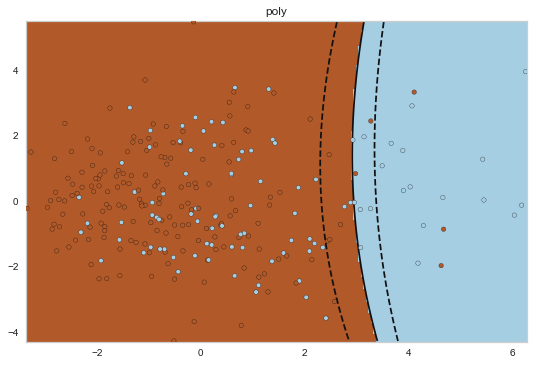

In [43]:
from sklearn import svm


for kernel in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(pc_train, Y_train.values.ravel())

    support_vectors = clf.support_vectors_
    
    #predictions = clf.predict(pc_test)
    #print(classification_report(Y_test, predictions))
    
    # Visualize support vectors
    plt.figure()
    plt.clf()

    plt.scatter(pc_train[:, 0], pc_train[:, 1], c=Y_train.values, zorder=10, cmap=plt.cm.Paired,
                    edgecolor='k', s=20)


    x_min = pc_train[:, 0].min()
    x_max = pc_train[:, 0].max()
    y_min = pc_train[:, 1].min()
    y_max = pc_train[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    plt.title(kernel)

plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(pc_train, Y_train.values.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ....................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [45]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [46]:
from sklearn.metrics import classification_report

grid_predictions = grid.predict(pc_test)
  
# print classification report
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.53      0.26      0.35        35
           1       0.77      0.92      0.84        96

    accuracy                           0.74       131
   macro avg       0.65      0.59      0.59       131
weighted avg       0.71      0.74      0.71       131



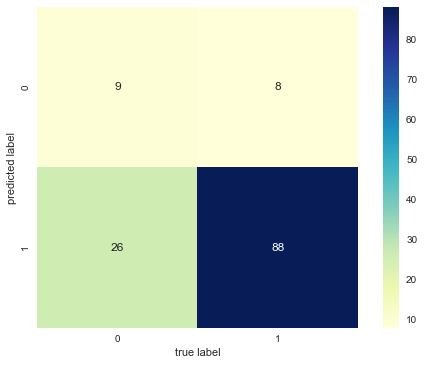

In [47]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test, grid_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu")

plt.xlabel('true label')
plt.ylabel('predicted label');

## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(pc_train, Y_train.values.ravel())

# predicting the x-test results
y_pred = model.predict(pc_test)

# calculating the accuracies
print("Training Accuracy :", model.score(pc_train, Y_train))
print("Testing Accuracy :", model.score(pc_test, Y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7404580152671756


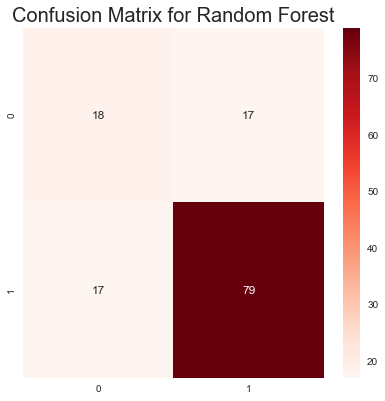

In [49]:
# creating a confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()